In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer, KNNImputer

In [29]:
data = pd.read_csv('stroke.csv')
data.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1074,43146,Male,8.0,0,0,No,children,Urban,106.40,18.3,Unknown,0
737,36109,Male,42.0,0,0,Yes,Private,Urban,78.49,31.8,smokes,0
184,28378,Male,61.0,1,1,Yes,Private,Urban,112.24,37.4,smokes,1
1264,47844,Female,38.0,0,0,Yes,Private,Urban,69.34,43.7,never smoked,0
3834,50495,Male,58.0,1,0,Yes,Private,Rural,106.27,28.6,never smoked,0
1968,2070,Male,52.0,0,0,Yes,Private,Urban,95.85,29.6,smokes,0
622,39601,Female,33.0,0,0,Yes,Private,Urban,69.40,47.8,never smoked,0
3330,48129,Female,56.0,0,0,Yes,Private,Urban,80.08,25.6,never smoked,0
3061,49883,Female,41.0,0,0,Yes,Private,Rural,65.40,36.9,formerly smoked,0
2830,54815,Female,49.0,0,0,Yes,Private,Urban,125.30,29.7,formerly smoked,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [31]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [32]:
data.drop(columns=[data.columns[0], 'id'], inplace=True)
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
968,Female,55.0,0,0,Yes,Private,Rural,112.47,32.8,smokes,0
2016,Male,48.0,1,0,Yes,Self-employed,Urban,83.34,49.3,never smoked,0
3304,Female,5.0,0,0,No,children,Rural,57.80,17.6,Unknown,0
2666,Male,66.0,1,0,Yes,Private,Urban,82.91,28.9,formerly smoked,0
4024,Female,58.0,0,0,Yes,Self-employed,Rural,81.96,34.6,never smoked,0
3924,Male,18.0,0,0,No,Private,Rural,118.93,22.4,never smoked,0
768,Male,33.0,0,0,Yes,Private,Rural,74.88,31.6,smokes,0
2674,Male,55.0,0,0,Yes,Private,Urban,62.56,28.6,never smoked,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3104,Female,42.0,0,0,Yes,Private,Urban,73.37,NaN,smokes,0


In [33]:
grouped_data = data.groupby(by=['Residence_type', 'work_type']).size().reset_index(name='count')
grouped_data

,Residence_type,work_type,count
0,Rural,Govt_job,312
1,Rural,Never_worked,7
2,Rural,Private,1462
3,Rural,Self-employed,393
4,Rural,children,340
5,Urban,Govt_job,345
6,Urban,Never_worked,15
7,Urban,Private,1463
8,Urban,Self-employed,426
9,Urban,children,347


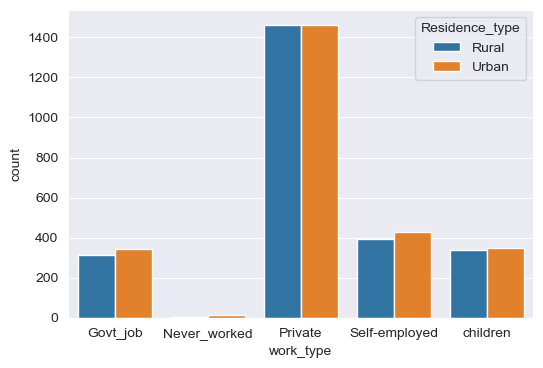

In [34]:
plt.figure(figsize=(6, 4))
sns.barplot(data=grouped_data, x='work_type', y='count', hue='Residence_type')
plt.show()

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [36]:
data.groupby(by=['heart_disease', 'stroke']).size().reset_index(name='count')

,heart_disease,stroke,count
0,0,0,4632
1,0,1,202
2,1,0,229
3,1,1,47


In [37]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [39]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [40]:
one_hot_encoder = pd.get_dummies(data["smoking_status"])
data_copy = data.copy()
data_copy = pd.concat([data_copy, one_hot_encoder], axis=1)
data_copy.drop(columns=['smoking_status'], inplace=True)

In [41]:
data_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,False,True,False,False
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,1,False,False,True,False
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,False,False,True,False
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,False,False,False,True
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,False,False,True,False


In [43]:
data_freq = data.copy()
freq = data["smoking_status"].value_counts() / len(data_freq)
data_freq["smoking_freq"] = data["smoking_status"].map(freq)
data_freq.drop(columns=['smoking_status'], inplace=True)
data_freq.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_freq
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,0.173190
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,1,0.370254
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,0.370254
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,0.154403
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,0.370254


In [44]:
data_freq["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [46]:
gender_one_hot = pd.get_dummies(data_freq['gender'], prefix='gender')
data_freq = pd.concat([data_freq, gender_one_hot], axis=1)
data_freq.drop('gender', axis=1, inplace=True)

In [47]:
data_freq.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_freq,gender_Female,gender_Male,gender_Other
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,0.173190,False,True,False
1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,1,0.370254,True,False,False
2,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,0.370254,False,True,False
3,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,0.154403,True,False,False
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,0.370254,True,False,False


In [50]:
data_freq.sample()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_freq,gender_Female,gender_Male,gender_Other
2779,6.0,0,0,No,children,Rural,84.1,19.8,0,0.302153,True,False,False


In [52]:
data_freq["ever_married"].unique()
data_freq["ever_married"] = data["ever_married"].map({"Yes": 1, "No": 0})

In [54]:
data_freq.sample()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_freq,gender_Female,gender_Male,gender_Other
799,14.0,0,0,0,children,Rural,78.09,26.4,0,0.302153,True,False,False


In [56]:
data_freq["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [57]:
work_one_hot = pd.get_dummies(data_freq['work_type'], prefix='work')
data_freq = pd.concat([data_freq, work_one_hot], axis=1)
data_freq.drop('work_type', axis=1, inplace=True)

In [60]:
print(data_freq.head())
print(data_freq.sample())

    age  hypertension  heart_disease  ever_married Residence_type  \
0  67.0             0              1             1          Urban   
1  61.0             0              0             1          Rural   
2  80.0             0              1             1          Rural   
3  49.0             0              0             1          Urban   
4  79.0             1              0             1          Rural   

   avg_glucose_level   bmi  stroke  smoking_freq  gender_Female  gender_Male  \
0             228.69  36.6       1      0.173190          False         True   
1             202.21   NaN       1      0.370254           True        False   
2             105.92  32.5       1      0.370254          False         True   
3             171.23  34.4       1      0.154403           True        False   
4             174.12  24.0       1      0.370254           True        False   

   gender_Other  work_Govt_job  work_Never_worked  work_Private  \
0         False          False       

In [61]:
data_freq.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_freq,gender_Female,gender_Male,gender_Other,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,67.0,0,1,1,Urban,228.69,36.6,1,0.173190,False,True,False,False,False,True,False,False
1,61.0,0,0,1,Rural,202.21,NaN,1,0.370254,True,False,False,False,False,False,True,False
2,80.0,0,1,1,Rural,105.92,32.5,1,0.370254,False,True,False,False,False,True,False,False
3,49.0,0,0,1,Urban,171.23,34.4,1,0.154403,True,False,False,False,False,True,False,False
4,79.0,1,0,1,Rural,174.12,24.0,1,0.370254,True,False,False,False,False,False,True,False


In [62]:
data_freq.isna().sum()

age                     0
hypertension            0
heart_disease           0
ever_married            0
Residence_type          0
avg_glucose_level       0
bmi                   201
stroke                  0
smoking_freq            0
gender_Female           0
gender_Male             0
gender_Other            0
work_Govt_job           0
work_Never_worked       0
work_Private            0
work_Self-employed      0
work_children           0
dtype: int64

In [64]:
data_freq["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [66]:
# Map Urban -> 1, Rural -> 0
data_freq['Residence_type'] = data_freq['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [67]:
data_freq.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_freq,gender_Female,gender_Male,gender_Other,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,67.0,0,1,1,1,228.69,36.6,1,0.173190,False,True,False,False,False,True,False,False
1,61.0,0,0,1,0,202.21,NaN,1,0.370254,True,False,False,False,False,False,True,False
2,80.0,0,1,1,0,105.92,32.5,1,0.370254,False,True,False,False,False,True,False,False
3,49.0,0,0,1,1,171.23,34.4,1,0.154403,True,False,False,False,False,True,False,False
4,79.0,1,0,1,0,174.12,24.0,1,0.370254,True,False,False,False,False,False,True,False


In [68]:
data_freq["bmi"].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

<Axes: xlabel='heart_disease', ylabel='Count'>

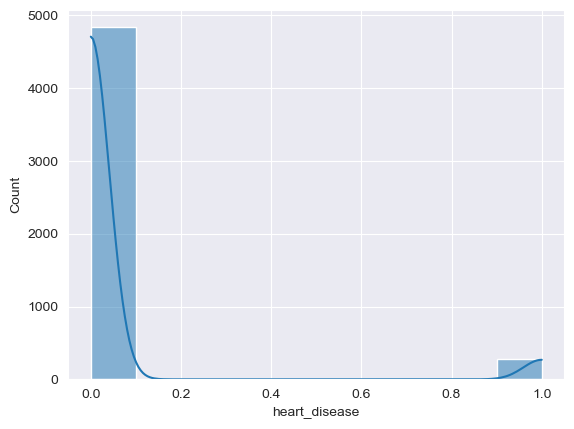

In [69]:
sns.histplot(data_freq['heart_disease'], kde=True, bins=10)

<Axes: xlabel='bmi', ylabel='Count'>

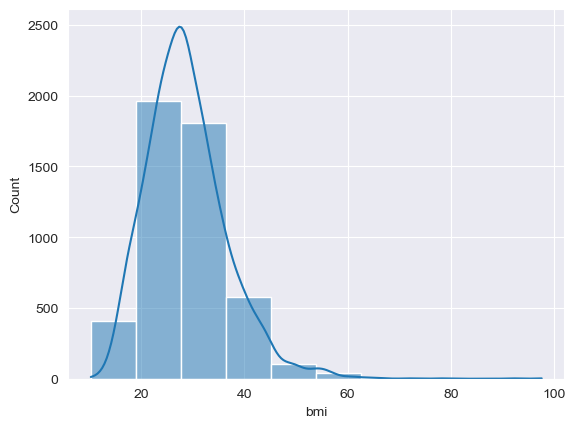

In [74]:
sns.histplot(data["bmi"], kde=True, bins=10)

<Axes: xlabel='bmi'>

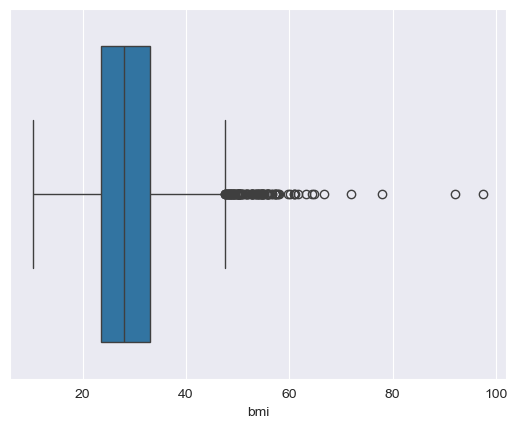

In [75]:
sns.boxplot(x=data['bmi'])


In [79]:
median_imputer = SimpleImputer(strategy="median")

In [80]:
data_freq[['bmi']] = median_imputer.fit_transform(data_freq[['bmi']])

In [81]:
data_freq.sample()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_freq,gender_Female,gender_Male,gender_Other,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
1608,59.0,0,0,1,1,93.58,25.1,0,0.154403,False,True,False,False,False,True,False,False


In [82]:
data_freq.isna().sum()

age                   0
hypertension          0
heart_disease         0
ever_married          0
Residence_type        0
avg_glucose_level     0
bmi                   0
stroke                0
smoking_freq          0
gender_Female         0
gender_Male           0
gender_Other          0
work_Govt_job         0
work_Never_worked     0
work_Private          0
work_Self-employed    0
work_children         0
dtype: int64

<Axes: >

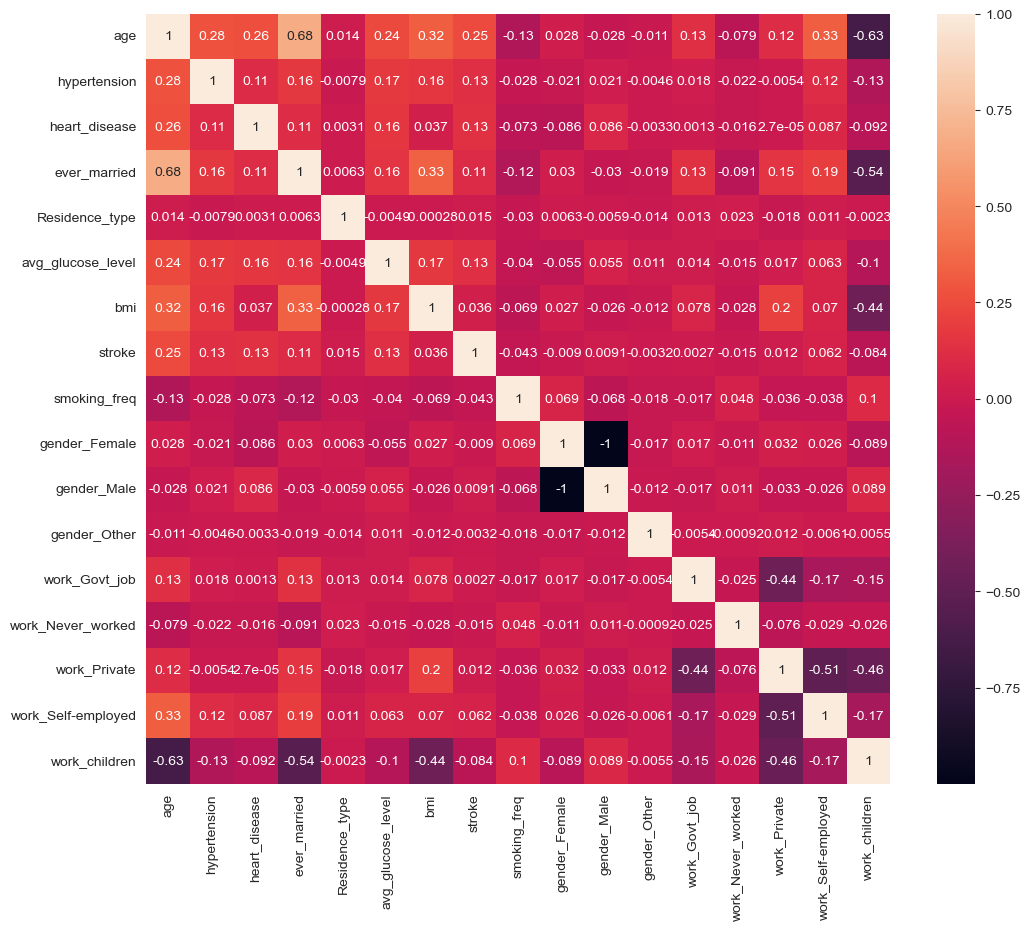

In [84]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_freq.corr(numeric_only=True), annot=True)

In [130]:
data_freq.sample()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_freq,gender_Female,gender_Male,gender_Other,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
3018,28.0,0,0,1,0,73.39,30.8,0,0.302153,True,False,False,False,False,True,False,False


In [132]:
X, y = data_freq.drop(columns="stroke"), data_freq["stroke"]

In [134]:
len(X)

5110

In [135]:
len(y)

5110

In [141]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [142]:
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.fit_transform(test_X)

In [143]:
classifier = LogisticRegression().fit(train_X_scaled, train_y)

In [144]:
pred_y = classifier.predict(test_X)

/opt/anaconda3/envs/VnP/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [148]:
y.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [145]:
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

Accuracy: 0.057729941291585124
[[  0 963]
 [  0  59]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       963
           1       0.06      1.00      0.11        59

    accuracy                           0.06      1022
   macro avg       0.03      0.50      0.05      1022
weighted avg       0.00      0.06      0.01      1022



/opt/anaconda3/envs/VnP/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/VnP/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/VnP/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

In [97]:
data_freq['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [149]:
data_stroke = data_freq.loc[data_freq['stroke'] == 1]
data_stroke

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_freq,gender_Female,gender_Male,gender_Other,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,67.0,0,1,1,1,228.69,36.6,1,0.173190,False,True,False,False,False,True,False,False
1,61.0,0,0,1,0,202.21,28.1,1,0.370254,True,False,False,False,False,False,True,False
2,80.0,0,1,1,0,105.92,32.5,1,0.370254,False,True,False,False,False,True,False,False
3,49.0,0,0,1,1,171.23,34.4,1,0.154403,True,False,False,False,False,True,False,False
4,79.0,1,0,1,0,174.12,24.0,1,0.370254,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,57.0,0,0,1,0,84.96,36.7,1,0.302153,False,True,False,False,False,True,False,False
245,14.0,0,0,0,0,57.93,30.9,1,0.302153,True,False,False,False,False,False,False,True
246,75.0,0,0,1,0,78.80,29.3,1,0.173190,True,False,False,False,False,False,True,False
247,71.0,1,0,1,0,87.80,28.1,1,0.302153,False,True,False,False,False,False,True,False


In [150]:
data_no_stroke = data_freq.loc[data['stroke'] == 0]
data_no_stroke = data_no_stroke.sample(300)
data_no_stroke

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_freq,gender_Female,gender_Male,gender_Other,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
4630,31.0,0,0,1,1,79.81,26.4,0,0.370254,False,True,False,False,False,True,False,False
4441,42.0,0,0,1,1,87.40,24.5,0,0.173190,True,False,False,False,False,True,False,False
1507,34.0,0,0,1,0,70.18,24.9,0,0.302153,True,False,False,True,False,False,False,False
5012,44.0,0,0,1,1,73.87,28.8,0,0.154403,True,False,False,False,False,True,False,False
1926,50.0,0,0,1,1,91.08,26.4,0,0.370254,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,54.0,0,0,1,1,65.49,34.7,0,0.302153,True,False,False,False,False,True,False,False
1418,54.0,0,0,1,0,150.27,38.2,0,0.154403,False,True,False,False,False,True,False,False
2264,67.0,0,0,1,1,58.51,30.4,0,0.173190,False,True,False,False,False,True,False,False
709,23.0,0,0,0,1,60.50,27.1,0,0.173190,True,False,False,False,False,True,False,False


In [151]:
new_data = pd.concat([data_no_stroke, data_stroke])
new_data

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_freq,gender_Female,gender_Male,gender_Other,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
4630,31.0,0,0,1,1,79.81,26.4,0,0.370254,False,True,False,False,False,True,False,False
4441,42.0,0,0,1,1,87.40,24.5,0,0.173190,True,False,False,False,False,True,False,False
1507,34.0,0,0,1,0,70.18,24.9,0,0.302153,True,False,False,True,False,False,False,False
5012,44.0,0,0,1,1,73.87,28.8,0,0.154403,True,False,False,False,False,True,False,False
1926,50.0,0,0,1,1,91.08,26.4,0,0.370254,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,57.0,0,0,1,0,84.96,36.7,1,0.302153,False,True,False,False,False,True,False,False
245,14.0,0,0,0,0,57.93,30.9,1,0.302153,True,False,False,False,False,False,False,True
246,75.0,0,0,1,0,78.80,29.3,1,0.173190,True,False,False,False,False,False,True,False
247,71.0,1,0,1,0,87.80,28.1,1,0.302153,False,True,False,False,False,False,True,False


In [101]:
new_data = new_data.sample(frac=1)
new_data

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_freq,gender_Female,gender_Male,gender_Other,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,gender,work_type,smoking_status
3709,42.0,0,0,0,1,84.03,31.4,0,0.370254,True,False,False,False,False,True,False,False,NaN,NaN,NaN
219,73.0,0,1,Yes,0,219.73,28.6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,Govt_job,never smoked
1290,49.0,0,0,1,0,82.41,45.4,0,0.154403,True,False,False,False,False,True,False,False,NaN,NaN,NaN
85,54.0,0,0,Yes,0,96.97,29.1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,Private,smokes
239,60.0,0,1,Yes,1,91.92,35.9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,Private,smokes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,61.0,1,0,Yes,0,76.11,27.3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,Self-employed,smokes
1219,32.0,0,0,0,1,68.98,23.4,0,0.173190,True,False,False,True,False,False,False,False,NaN,NaN,NaN
72,66.0,1,0,Yes,0,116.55,31.1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Govt_job,formerly smoked
1457,27.0,0,0,0,0,191.79,28.1,0,0.154403,False,True,False,False,False,True,False,False,NaN,NaN,NaN


In [154]:
new_data.isna().sum()

age                   0
hypertension          0
heart_disease         0
ever_married          0
Residence_type        0
avg_glucose_level     0
bmi                   0
stroke                0
smoking_freq          0
gender_Female         0
gender_Male           0
gender_Other          0
work_Govt_job         0
work_Never_worked     0
work_Private          0
work_Self-employed    0
work_children         0
dtype: int64

In [152]:
X = new_data.drop(columns=['stroke'])
y = new_data['stroke']

In [153]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
classifier = LogisticRegression().fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

Accuracy: 0.8
[[43 10]
 [12 45]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        53
           1       0.82      0.79      0.80        57

    accuracy                           0.80       110
   macro avg       0.80      0.80      0.80       110
weighted avg       0.80      0.80      0.80       110



/opt/anaconda3/envs/VnP/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
model = XGBClassifier(max_depth=7, min_child_weight=1, n_estimators=50, n_jobs=-1, learning_rate=0.01)
model.fit(train_X, train_y)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [156]:
y_pred = model.predict(test_X)

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy: 0.8
[[44  9]
 [13 44]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        53
           1       0.83      0.77      0.80        57

    accuracy                           0.80       110
   macro avg       0.80      0.80      0.80       110
weighted avg       0.80      0.80      0.80       110

